In [1]:
library(ggplot2)
library(tidyr)
library(egg)
suppressPackageStartupMessages(library(dplyr))
# library(here)
# setwd(here("2023_MESA","demo"))
setwd("~/Documents/github/presentations/2023_MESA/demo")

map <- aes
plot <- ggplot
layer_line <- geom_line
layer_point <- geom_point
save_plot <- ggsave

options(repr.plot.width = 18, repr.plot.height = 12)
# options(jupyter.plot_mimetypes = "image/svg+xml")
options(jupyter.plot_mimetypes = "image/png")
theme_set(theme_grey(24))


Le chargement a n'ecessit'e le package : gridExtra



# Demo: exploring a complex dataset



In [17]:
d = read.table("results.dat", header = TRUE)
head(d)
# glimpse(d)

,Nsat,Rcore,Rsat,gap,satellite,wavelength,total_absorption,sat_absorption
,<int>,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>
1,1,20,2,1,Ag,350,2038.992,1.250810
2,1,20,2,1,Ag,352,2034.538,1.376851
3,1,20,2,1,Ag,354,2030.244,1.521263
4,1,20,2,1,Ag,356,2026.057,1.687591
5,1,20,2,1,Ag,358,2021.924,1.880255
6,1,20,2,1,Ag,360,2017.796,2.104805


,Rsat,Rcore,gap
,<dbl>,<int>,<int>
1,2.0,20,1
1006,2.0,30,1
2011,2.0,40,1
3016,2.5,20,1
4021,2.5,30,1
5026,2.5,40,1
6031,3.0,20,1
7036,3.0,30,1
8041,3.0,40,1


In [18]:
params = read.table("params.dat", header = TRUE)
params

Nsat,Rcore,Rsat,gap,satellite,epsCore,medium,N.mie,N.esa,N.nmax,N.inc,coupling,self.reaction,id
<int>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,1
50,20,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,2
100,20,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,3
150,20,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,4
200,20,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,5
1,30,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,6
50,30,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,7
100,30,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,8
150,30,2.0,1,Ag,epsAu,1.33,50,100,10,36,1,1,9


We'll start with a smaller dataset,

In [3]:

dsmall = read.table("results_small.dat", header = TRUE)
head(dsmall)
# glimpse(dsmall)


,Nsat,Rcore,Rsat,gap,satellite,wavelength,total_absorption,sat_absorption
,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,1,30,2,1,Ag,350,5907.557,1.231910
2,1,30,2,1,Ag,352,5913.806,1.359553
3,1,30,2,1,Ag,354,5920.307,1.505909
4,1,30,2,1,Ag,356,5926.971,1.674597
5,1,30,2,1,Ag,358,5933.706,1.870120
6,1,30,2,1,Ag,360,5940.414,2.098127


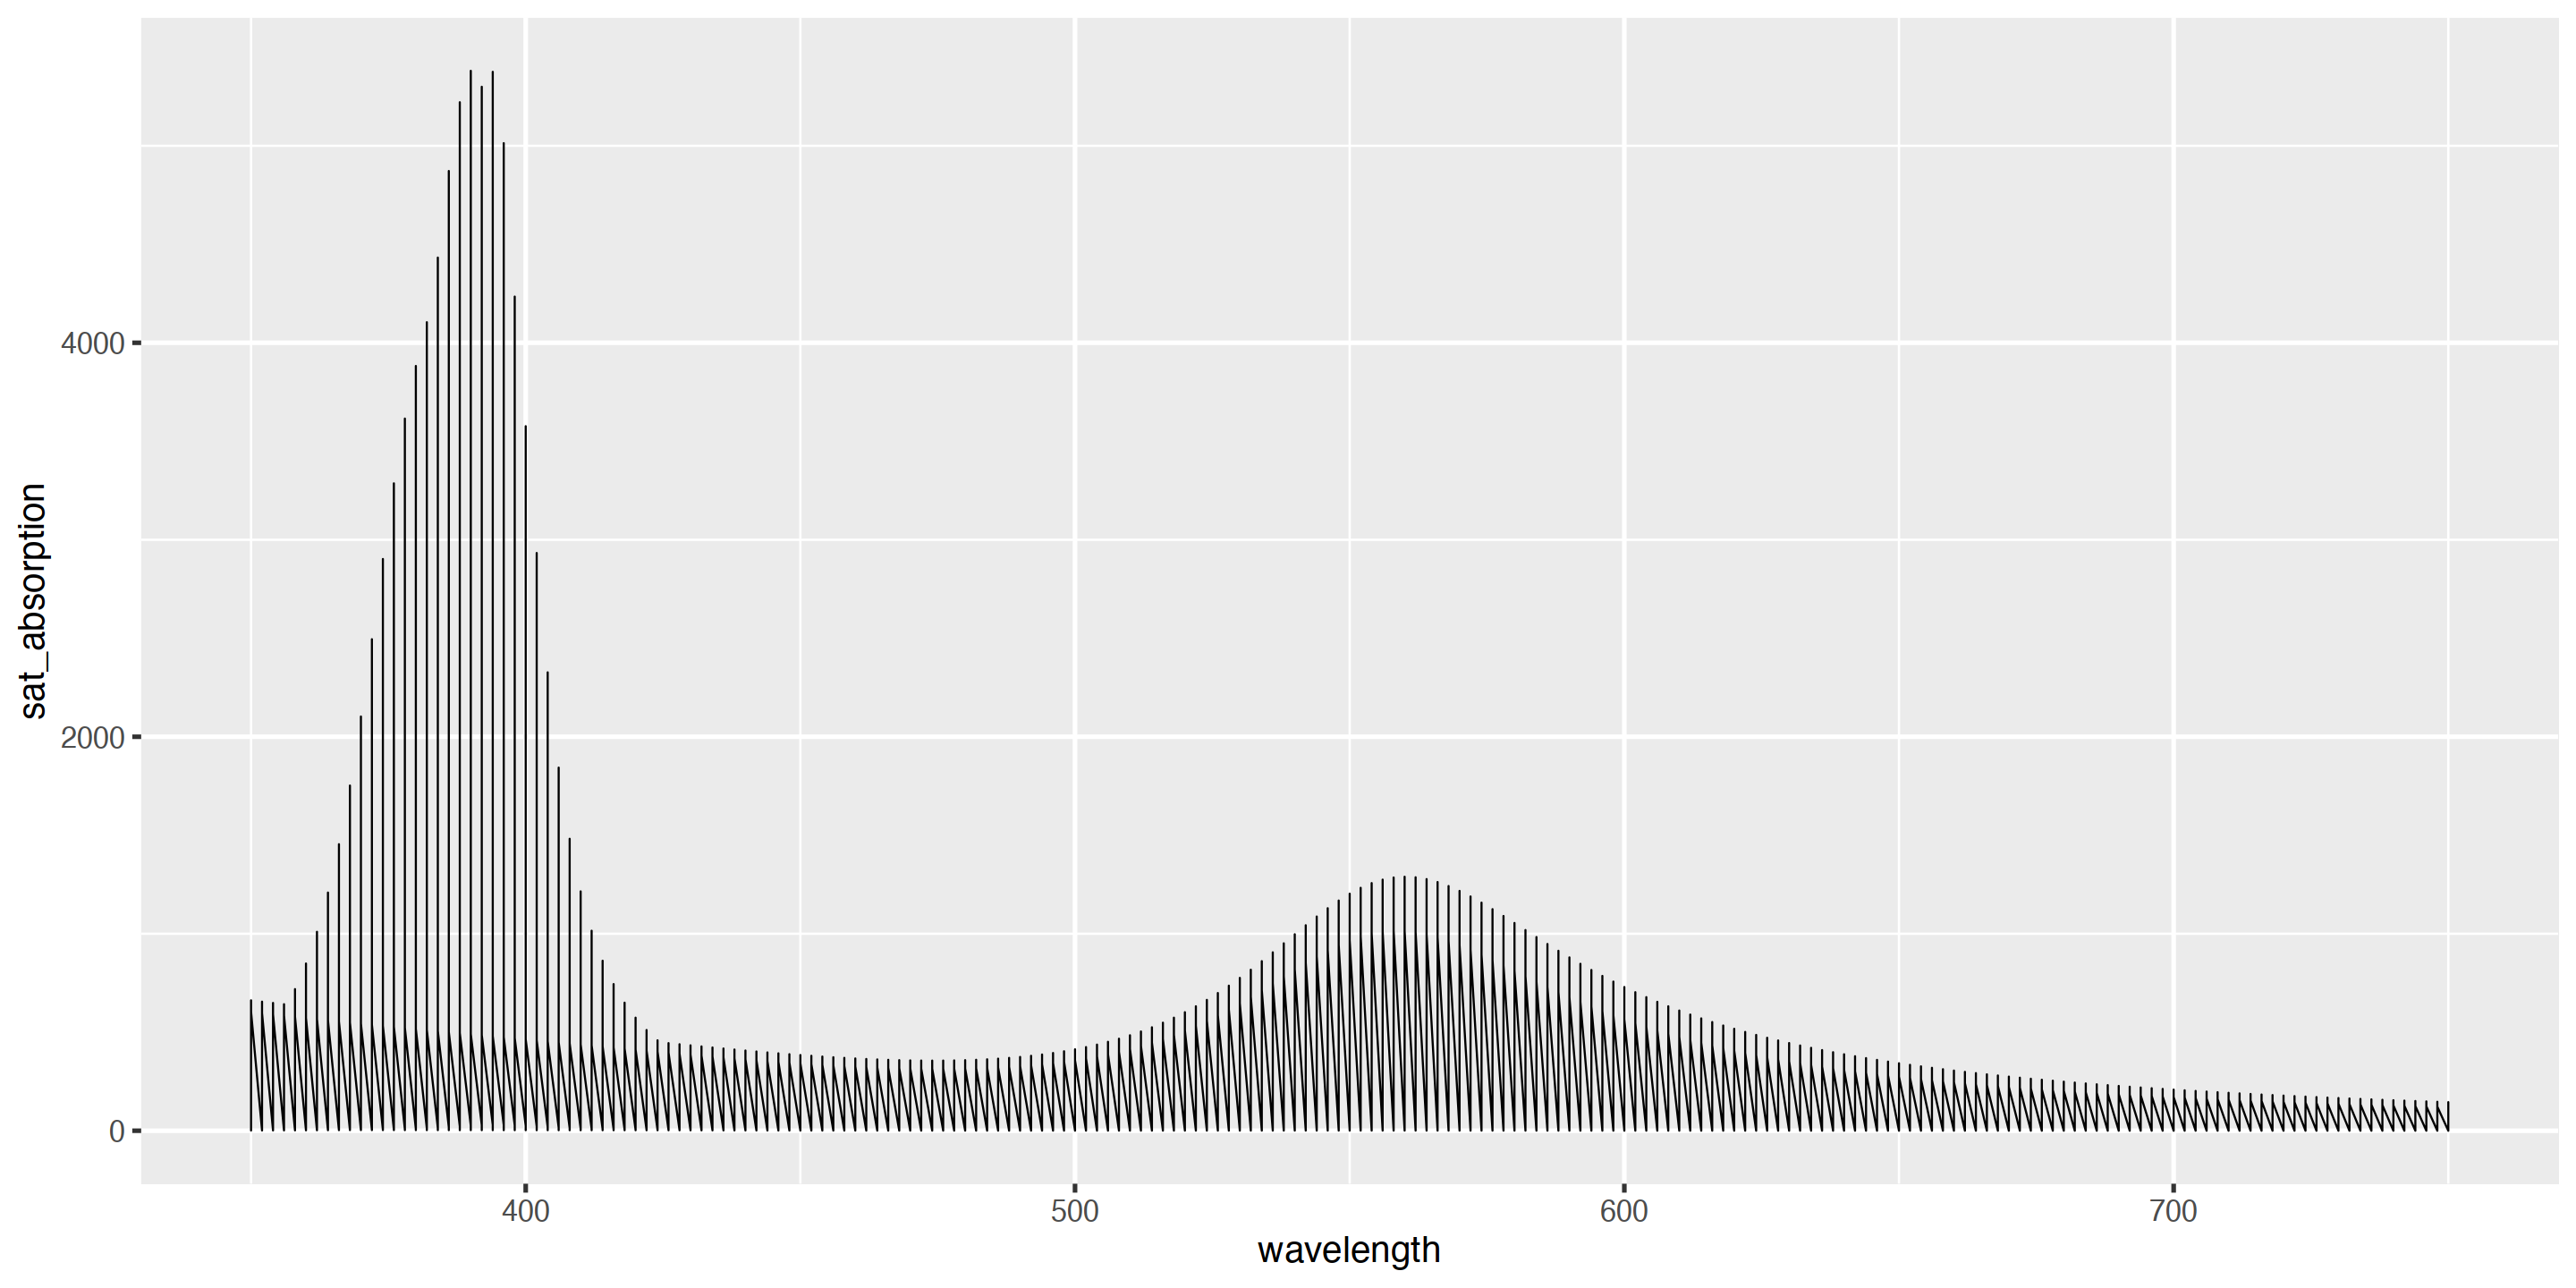

In [11]:
plot(data = dsmall, mapping = map(x = wavelength, y = sat_absorption)) +
    layer_line()

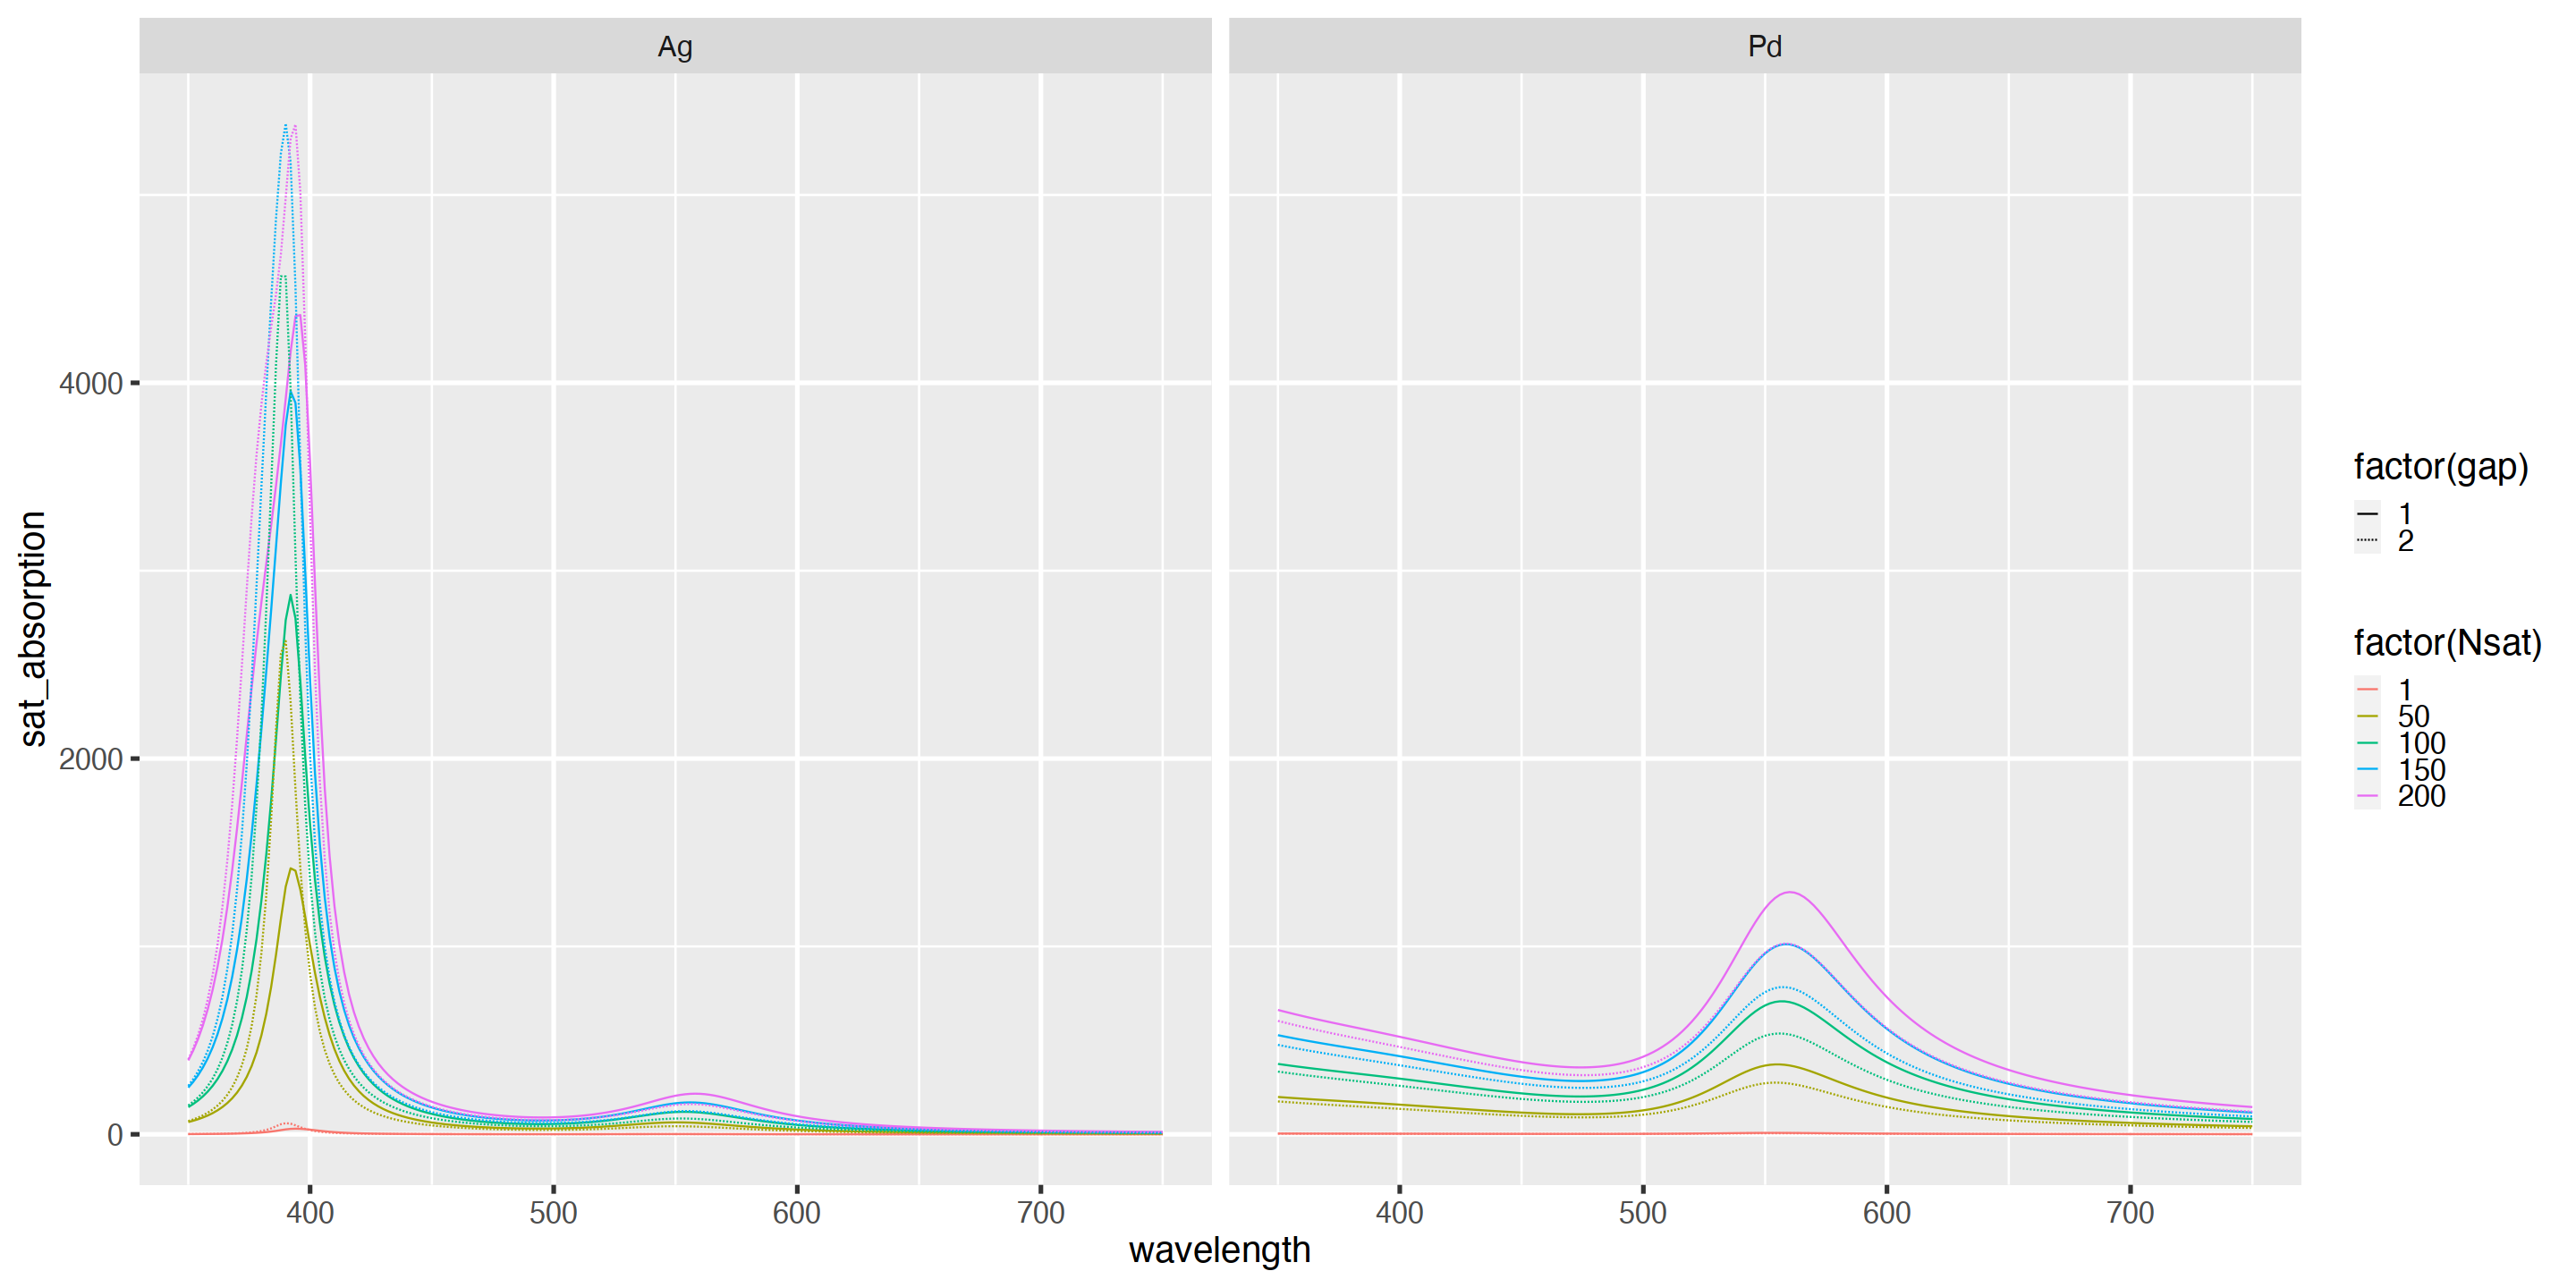

In [12]:
options(repr.plot.width=24, repr.plot.height=12)
plot(data = dsmall, mapping = map(x = wavelength, y = sat_absorption, 
                                    linetype=factor(gap), colour=factor(Nsat))) +
  facet_wrap(~satellite) +
  layer_line()


## polishing


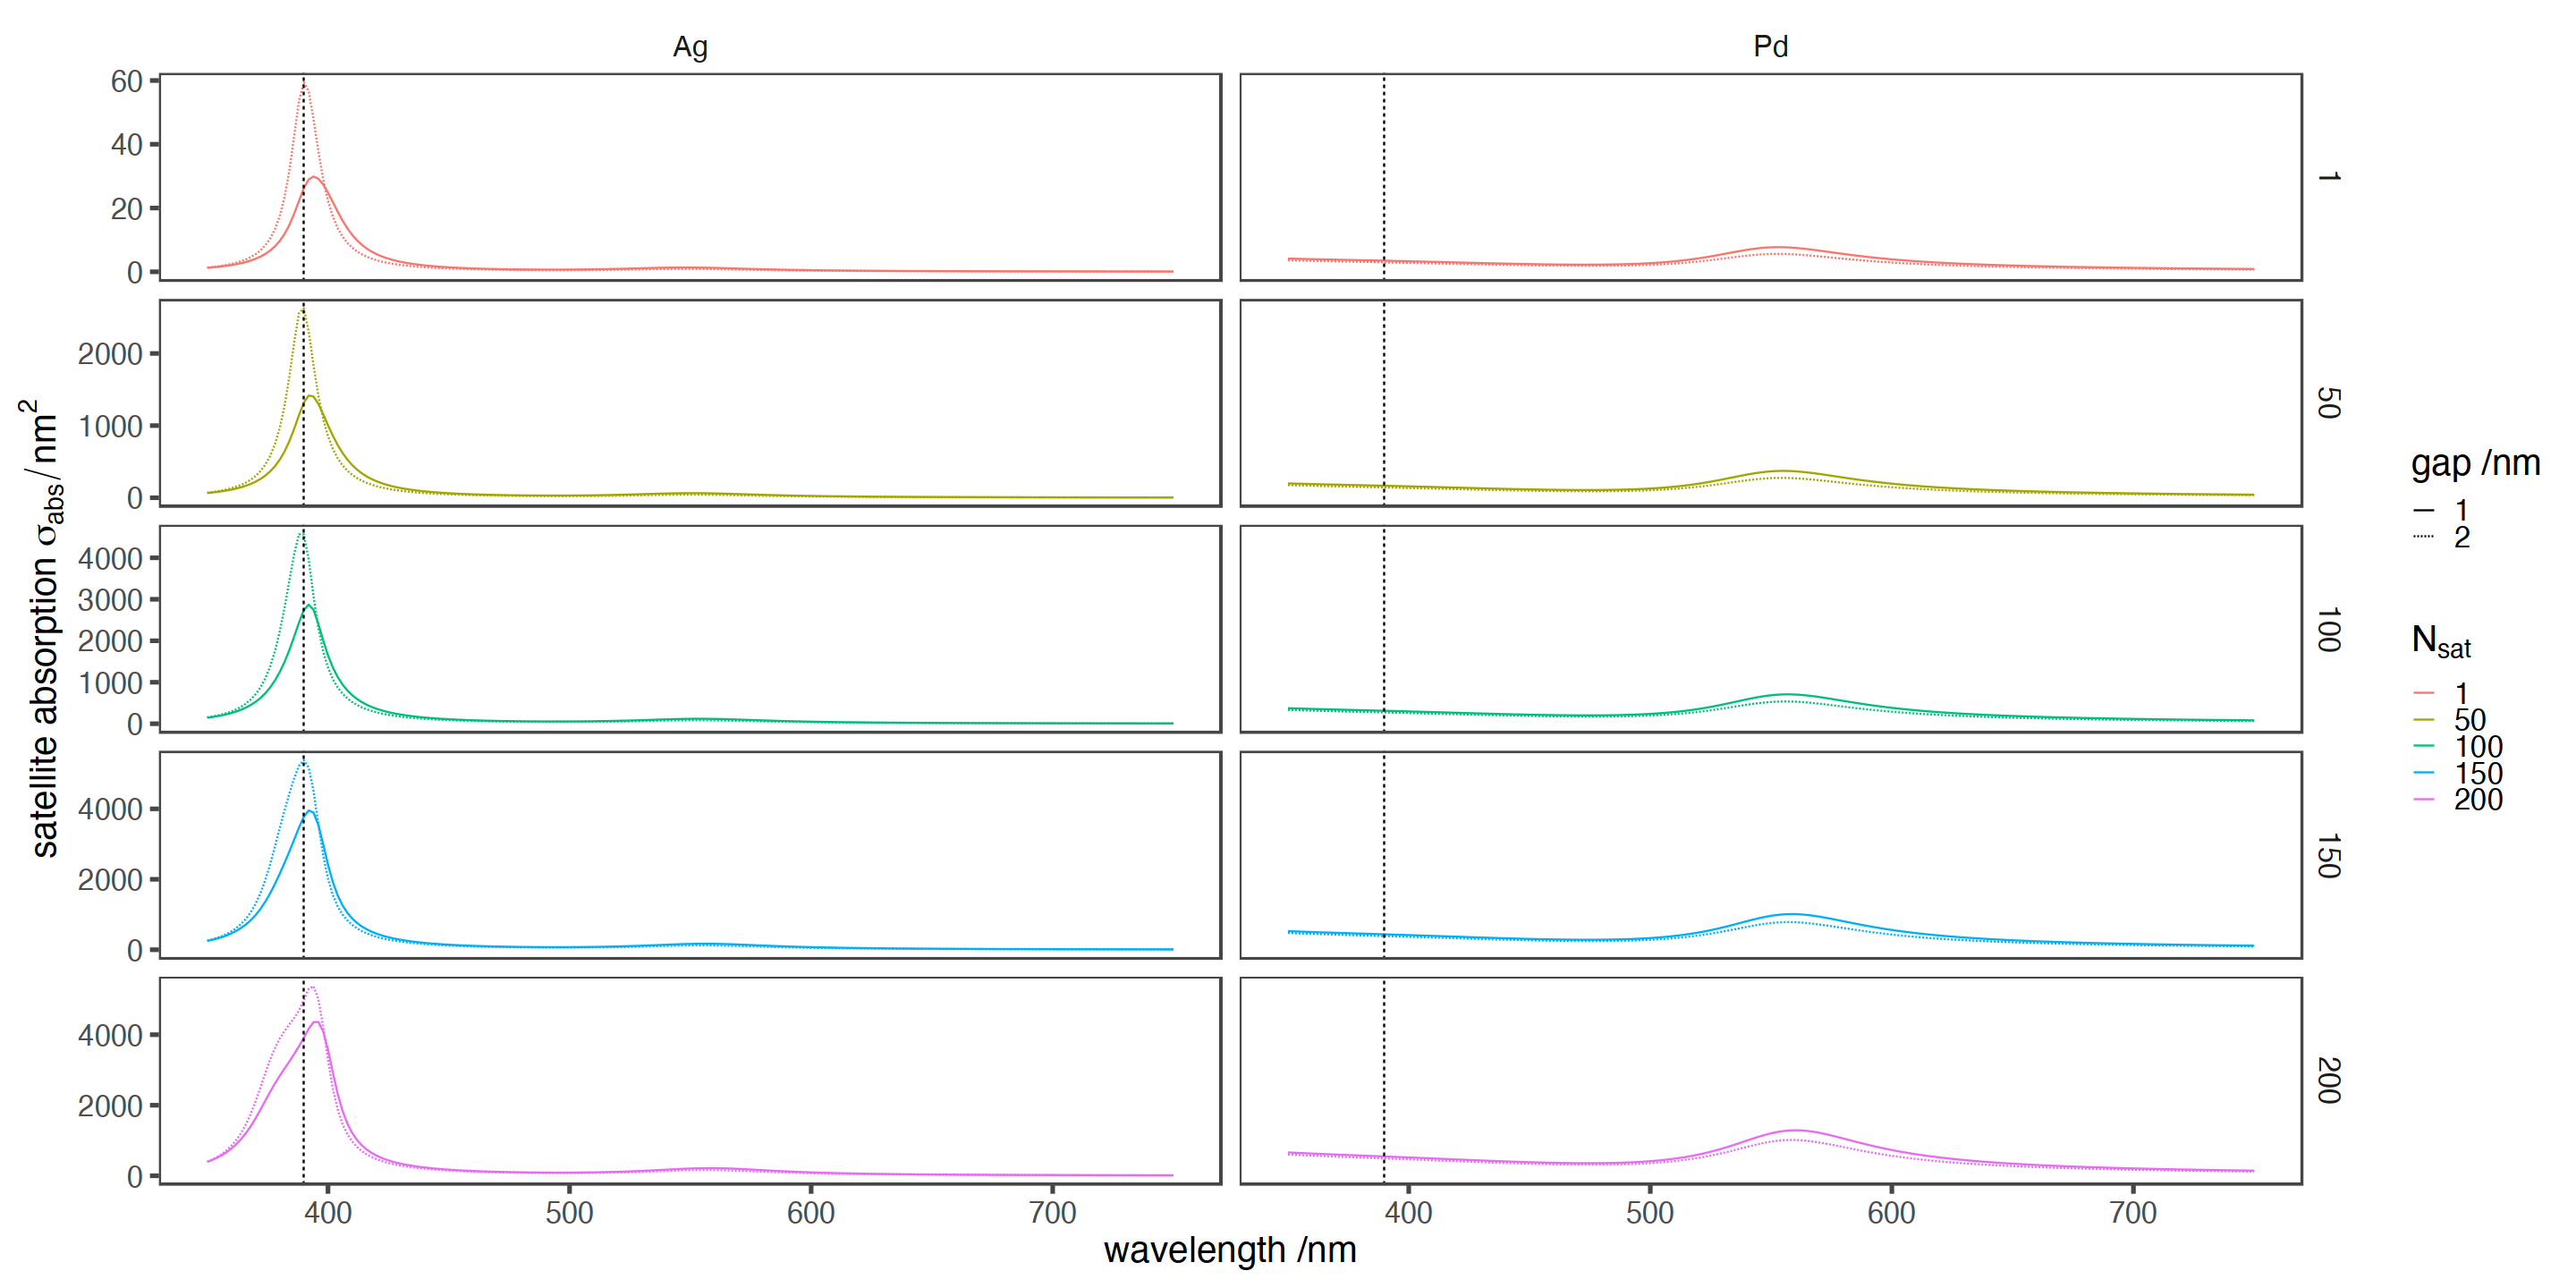

In [13]:


p = plot(data = dsmall, mapping = map(x = wavelength, y = sat_absorption, 
                                    linetype=factor(gap), colour=factor(Nsat))) +
  facet_wrap(~satellite) +
  layer_line()

p + facet_grid(Nsat~satellite, scales='free') +
  geom_vline(xintercept=390, lty=2) +
  theme_article(base_size=24) +
  labs(x = "wavelength /nm", y=expression("satellite absorption "*sigma[abs]/nm^2), 
       linetype="gap /nm", colour = expression(N[sat])) 



## full dataset

Warning message:
"Removed 1250 rows containing missing values (`geom_line()`)."


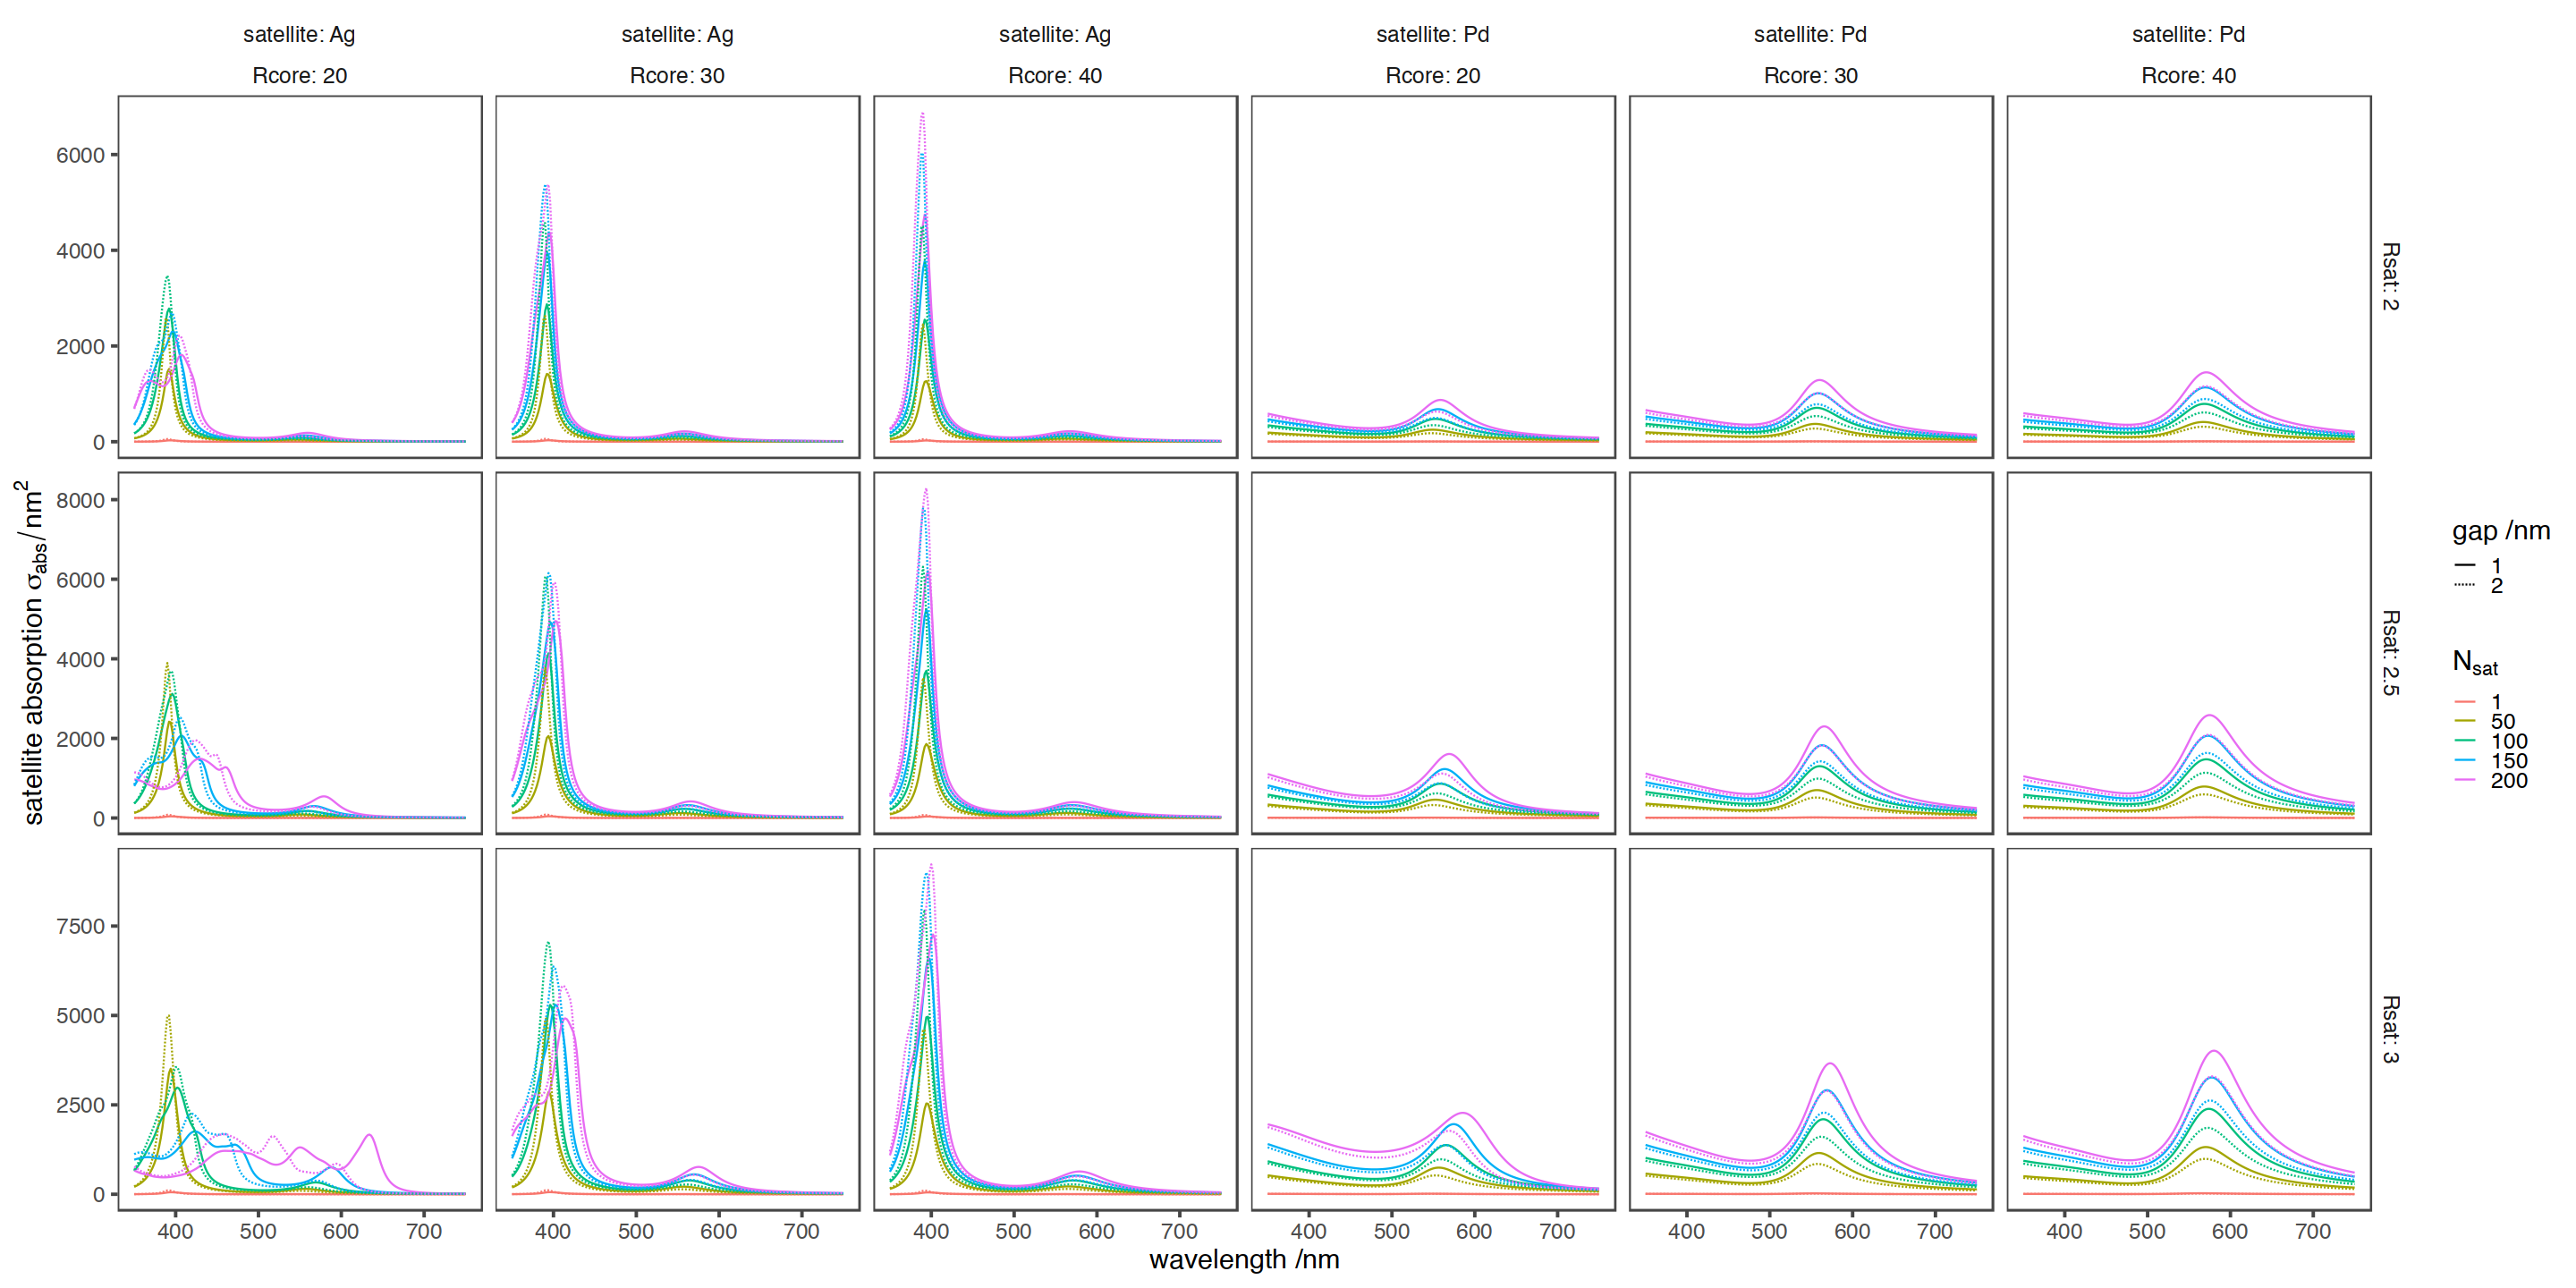

Warning message:
"Removed 1250 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 30 rows containing missing values (`geom_point()`)."


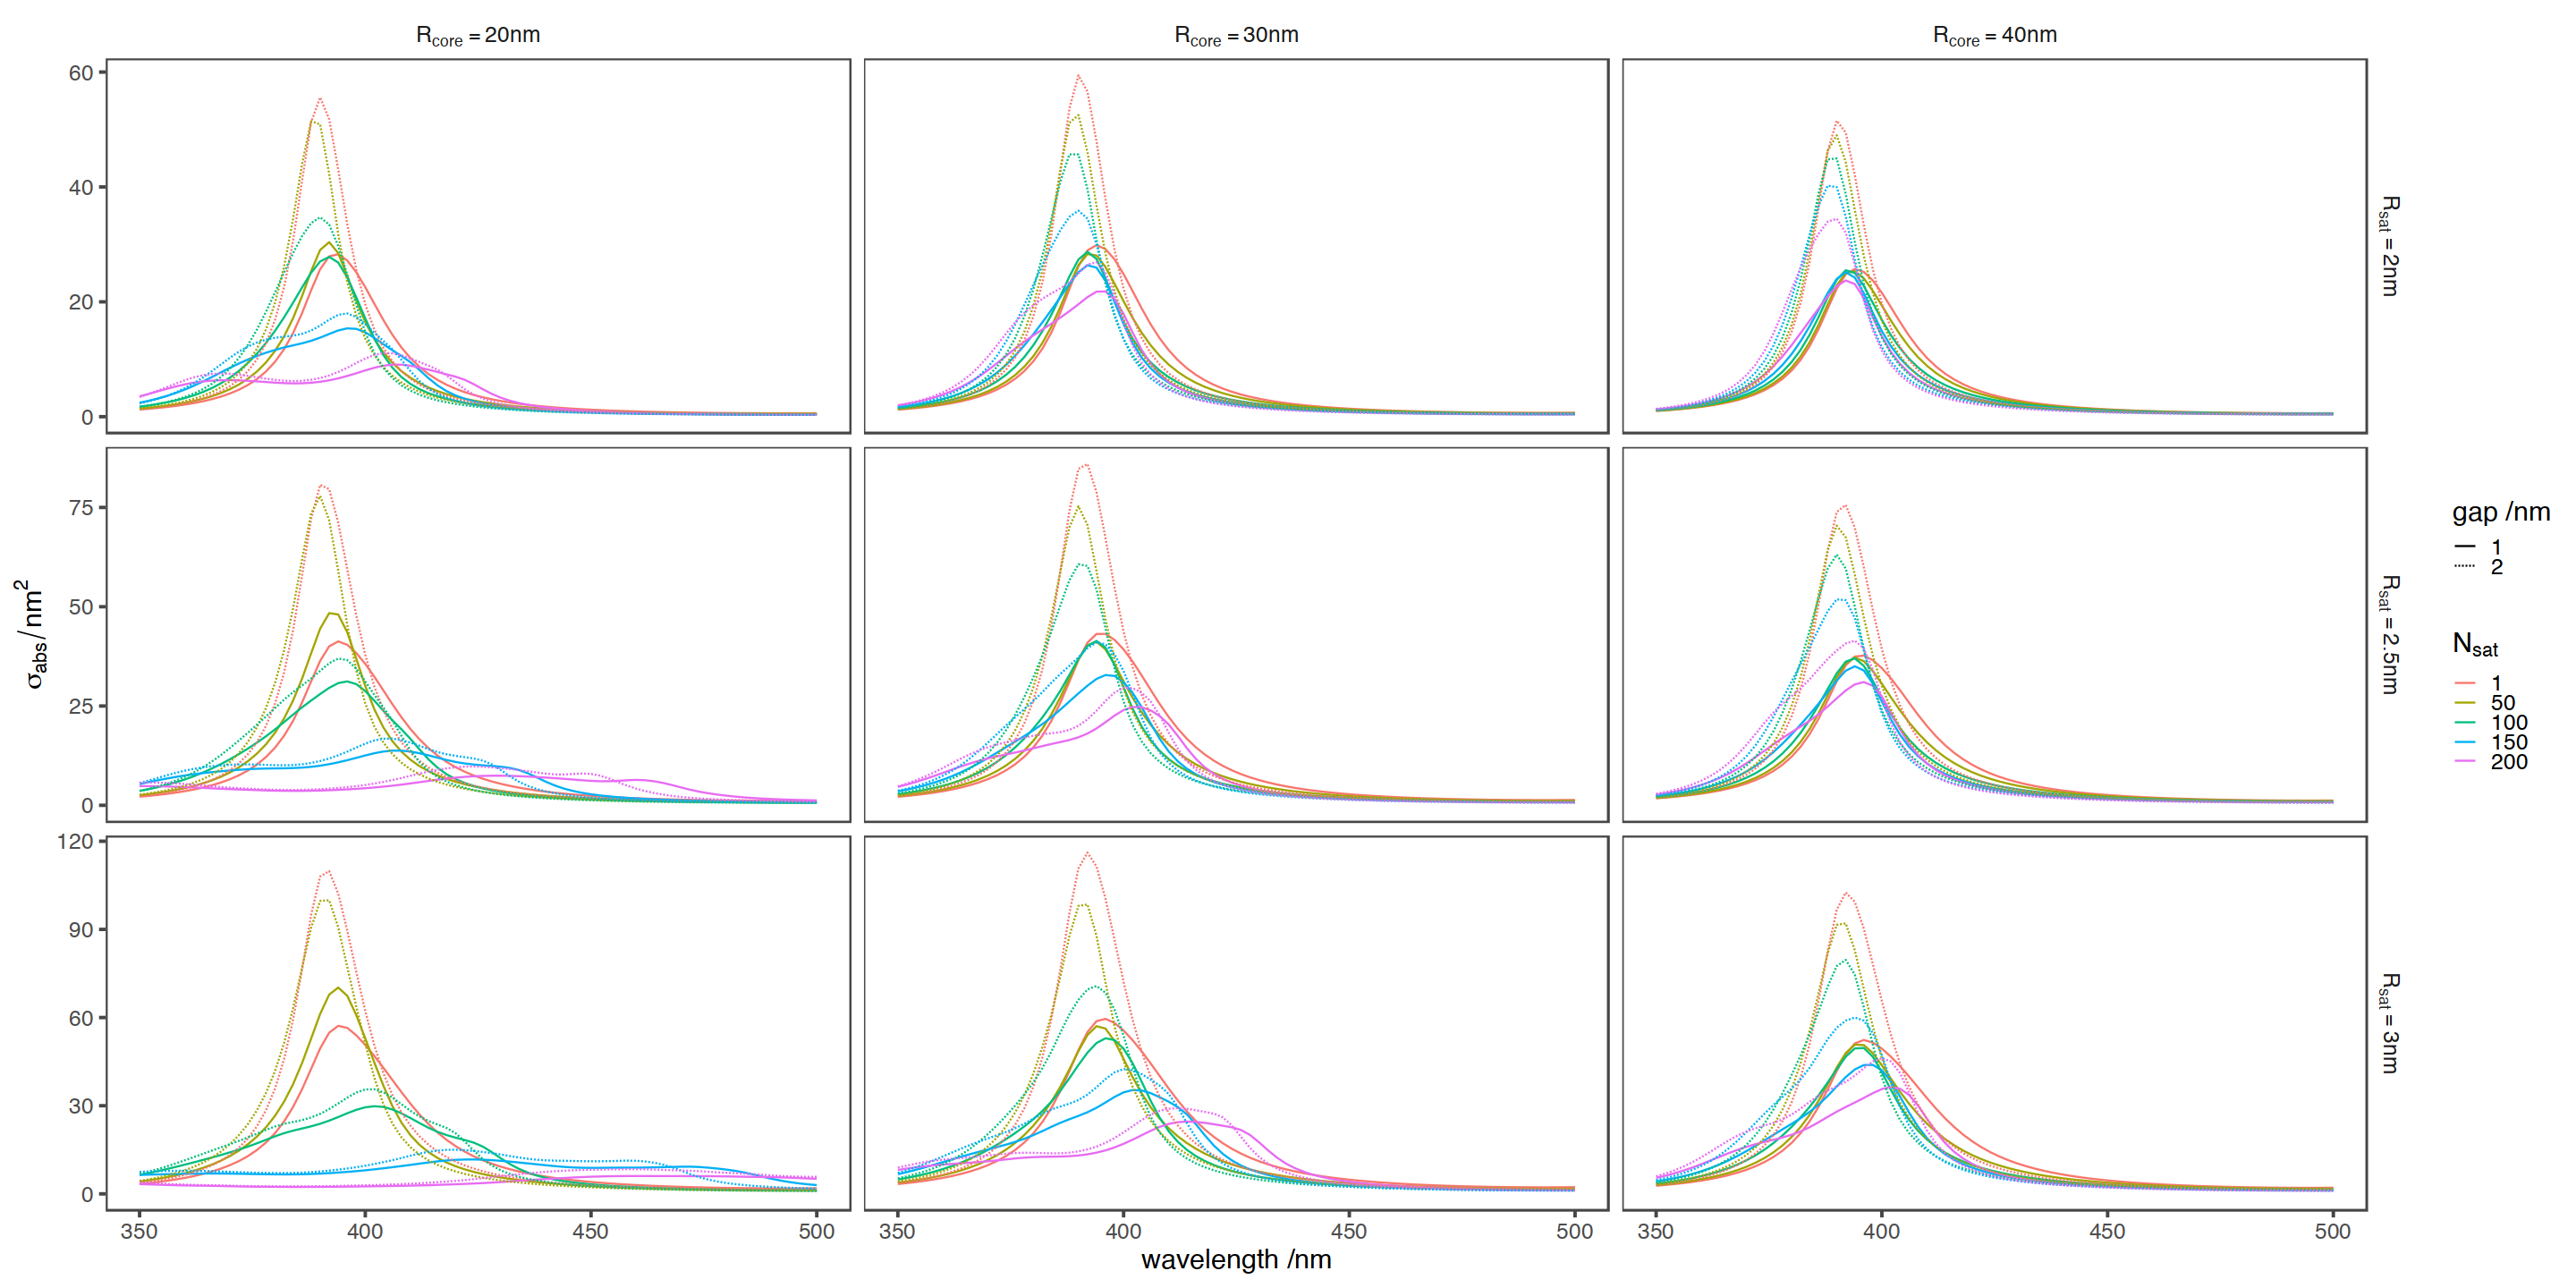

Warning message:
"Removed 1450 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 38 rows containing missing values (`geom_point()`)."
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"famille de police 'Gill Sans Nova' introuvable dans la base de donn'ees de polices PostScript"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"famille de police 'Gill Sans Nova' introuvable dans la base de donn'ees de polices PostScript"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"famille de police 'Gill Sans Nova' introuvable dans la base de donn'ees de polices PostScript"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"famille de police 'Gill Sans Nova' introuvable dans la base de donn'ees de polices PostScript"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"famille de police 'Gill Sans Nova' introuvable dans la base de donn'ees de polices PostScri

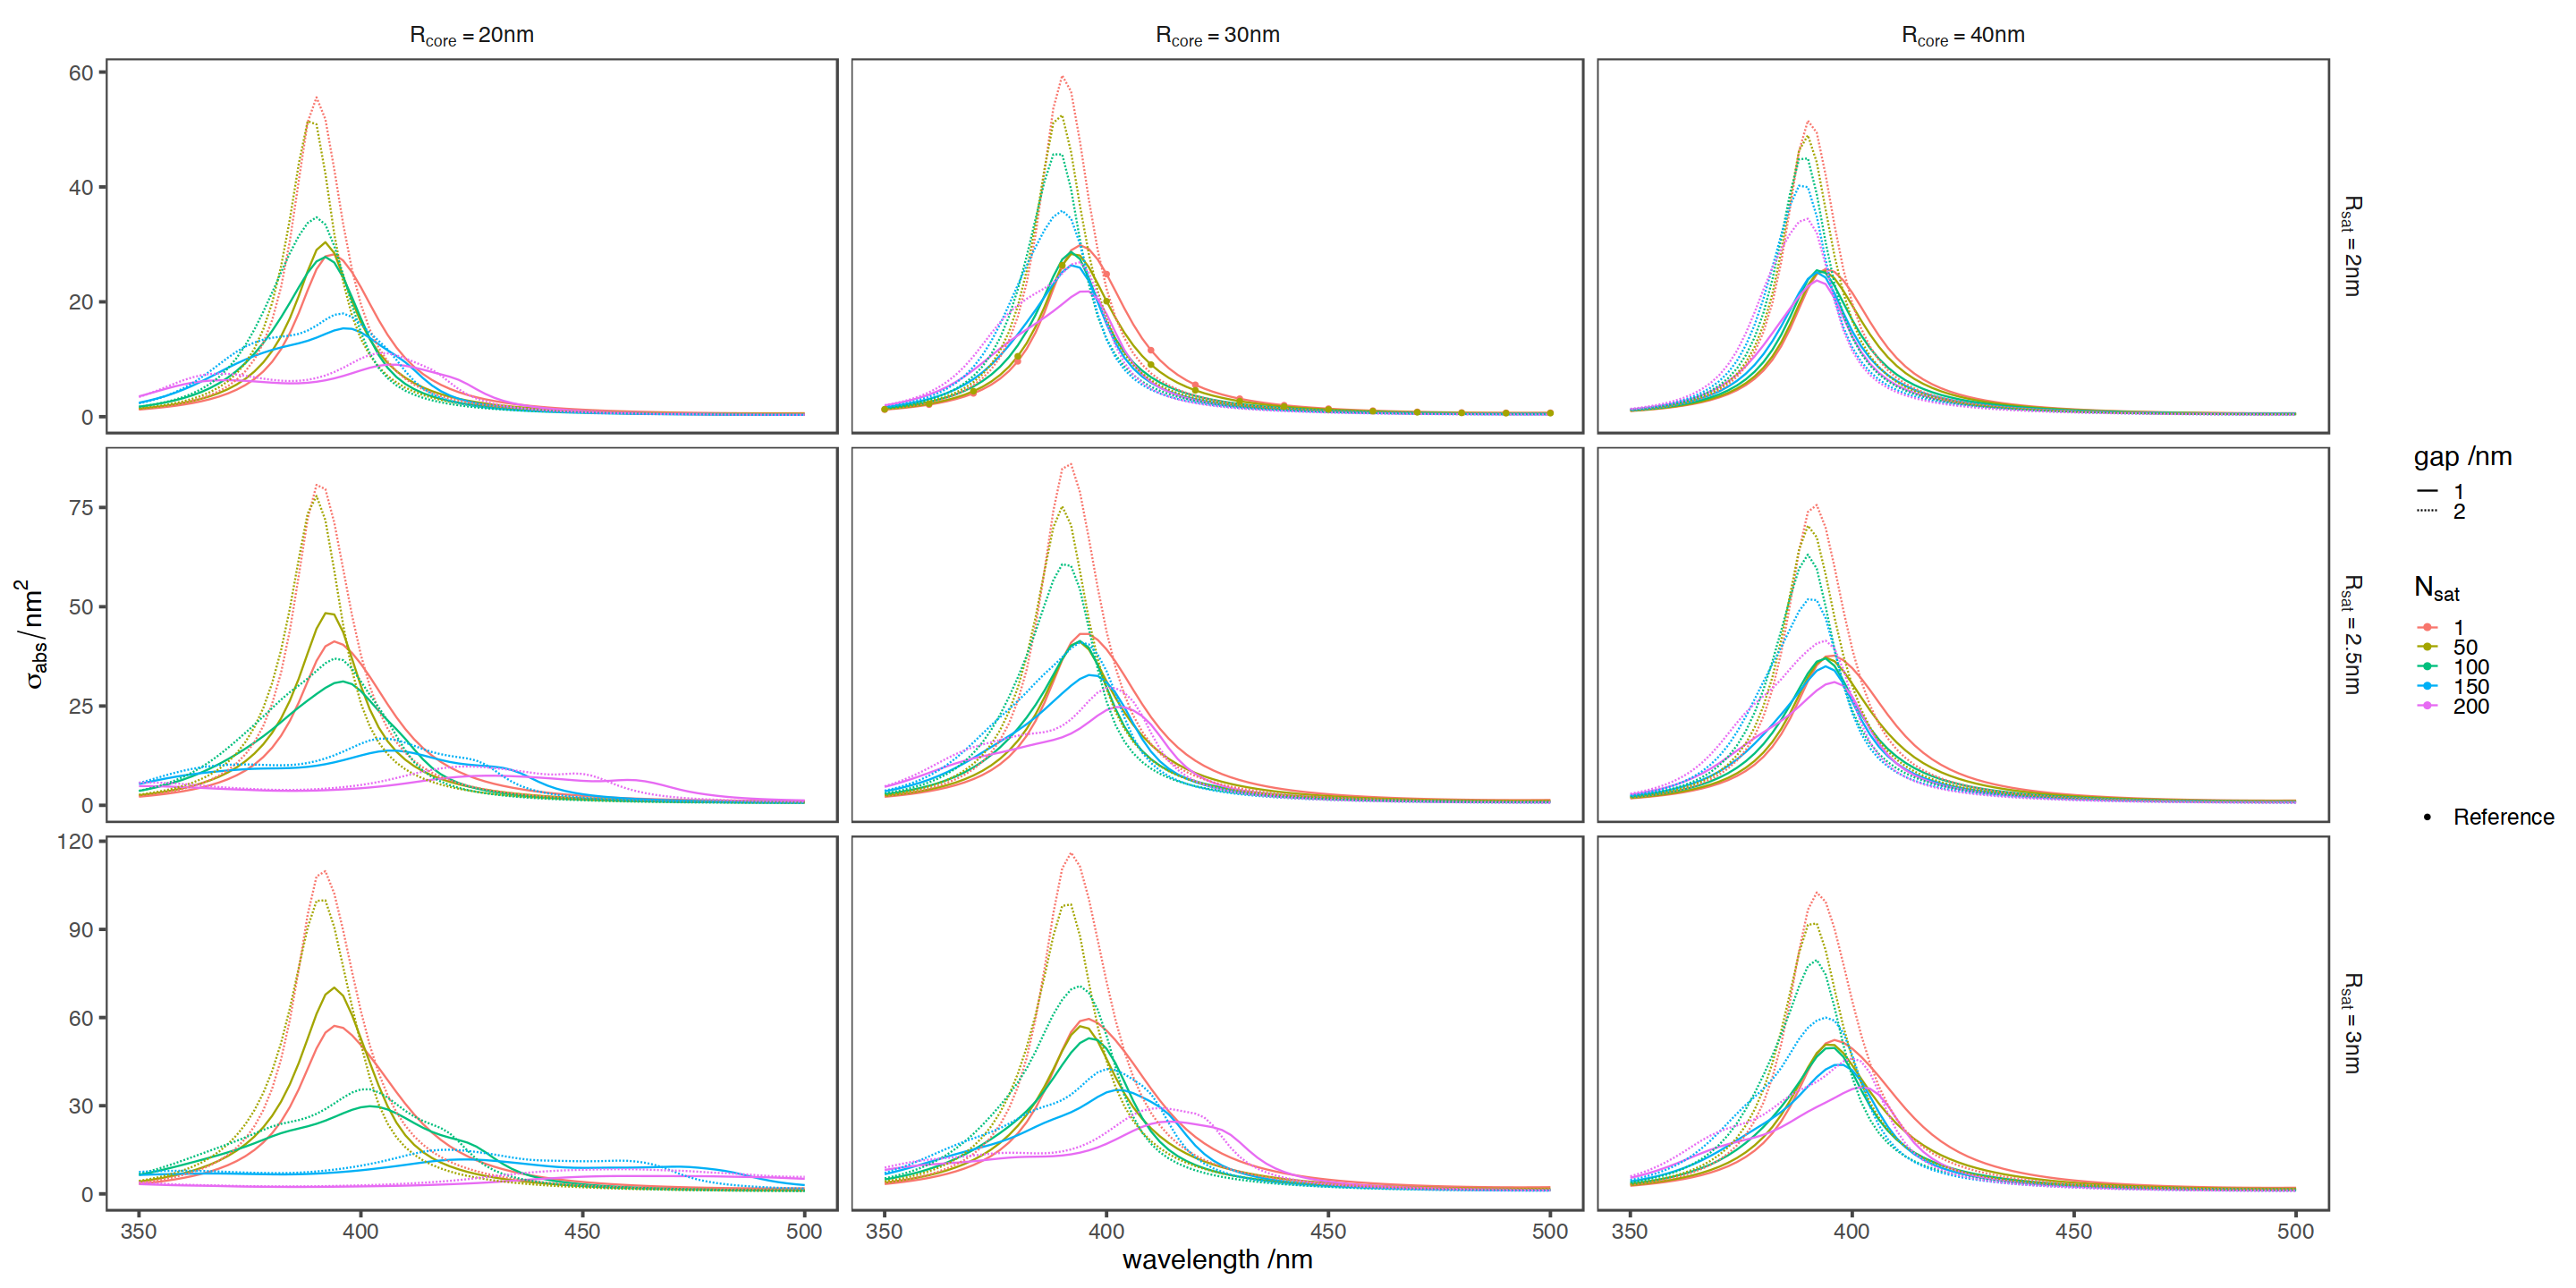

In [10]:




plot(data = d, mapping = map(x = wavelength, y = sat_absorption, 
                                        linetype=factor(gap), colour=factor(Nsat))) +
  layer_line() +
  facet_grid(Rsat~satellite+Rcore, scales='free', labeller = label_both) +
  theme_article(base_size=18) +
  labs(x = "wavelength /nm", y=expression("satellite absorption "*sigma[abs]/nm^2), 
       linetype="gap /nm", colour = expression(N[sat])) 


d2 = d |> filter(satellite == "Ag")
p <- plot(data = d2, mapping = map(x = wavelength, y = sat_absorption/Nsat, 
                               linetype=factor(gap), colour=factor(Nsat))) +
  layer_line() +
  facet_grid(Rsat~Rcore, scales='free', 
             labeller = label_bquote(rows=R[sat]==.(Rsat)*nm, cols=R[core]==.(Rcore)*nm)) +
  theme_article(base_size=18) +
  labs(x = "wavelength /nm", y=expression(sigma[abs]/nm^2), 
       linetype="gap /nm", colour = expression(N[sat])) 


last_plot() +
  scale_x_continuous(lim=c(350,500))


## other layers

d3 <-  read.table("results_terms.dat", header = TRUE) |> filter(satellite == "Ag")

p + layer_point(data=d3, aes(shape='Reference')) +
  scale_x_continuous(lim=c(350,500)) +
  labs(shape="") 

plot(data = d2, mapping = map(x = wavelength, y = sat_absorption/Nsat, 
                                linetype=factor(gap), colour=factor(Nsat))) +
  layer_line() +
  layer_point(data=d3, aes(shape='Reference')) +
  facet_grid(Rsat~Rcore, scales='free', 
             labeller = label_bquote(rows=R[sat]==.(Rsat)*nm, cols=R[core]==.(Rcore)*nm)) +
  scale_x_continuous(lim=c(350,460), expand=c(0,0)) +
  labs(x = "wavelength /nm", y=expression(sigma[abs]/nm^2), 
       linetype="gap /nm", colour = expression(N[sat]), shape="")  

save_plot(filename = "overview.pdf", plot = p + theme_presentation(base_size = 14, base_family = "Gill Sans Nova"),
width=9, height=6, device = cairo_pdf)


